# Séance 1 : Introduction aux SIG 
 
### SIG et Géomatique – Travaux Pratiques
O. Kaufmann, 2020, 2023.


In [1]:

# @info: Execute me to activate interactive questions
# ---------------------------------------------------

# O. KAUFMANN, 2024. 

from IPython import get_ipython
from IPython.core import magic_arguments
from IPython.core.magic import register_cell_magic
import ipywidgets as widgets
from IPython.display import HTML, clear_output
import codecs

def decode_text(text):
    return codecs.decode(text, 'hex').decode('utf')

def encode_text(text):
    return codecs.encode(codecs.encode(text,'utf8'), 'hex').decode('utf')
    
@magic_arguments.magic_arguments()
@magic_arguments.argument('--prompt', default='none', help='Encoded prompt')
@magic_arguments.argument('--answer', default='none', help='Encoded answer')
@magic_arguments.argument('--title', default='Question', help='First line of alert block')
@magic_arguments.argument('--button-label', default='Solution', help='Text to display on button')
@magic_arguments.argument('--div-type', default='alert-warning', help='Type of alert block')
    
@register_cell_magic
def display_prompt(line, cell):
    args = magic_arguments.parse_argstring(display_prompt, line)
    title = args.title
    prompt = args.prompt
    answer = args.answer
    button_label = args.button_label
    div_type = args.div_type
    def make_block(text, title=title, label=button_label, div_type=div_type):
        if title != 'none':
            return HTML(f"""<div class="alert alert-block {div_type}"> <b>{title}</b><br> {text} </div>""")
        else:
            return HTML(f"""<div class="alert alert-block {div_type}"> {text} </div>""")
    if prompt != 'none':
        display(make_block(decode_text(prompt)))
    toggle_button = widgets.ToggleButton(description=button_label)
    output = widgets.Output()
    def on_button_clicked(b):
        with output:
            if b['new']:  
                display(HTML(decode_text(answer)))
            else:
                output.clear_output()
    toggle_button.observe(on_button_clicked, 'value')
    display(toggle_button)
    display(output)

HTML("""<div class="alert alert-block alert-success"> <b>Success:</b><br>Interactive questions activated.</div>""")


Important: Exécutez-moi pour activer les questions interactives.

***
## 1. Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show
from rasterio.warp import calculate_default_transform, reproject, Resampling

***
## 2. Partie 1 - QGIS

<div class="alert alert-block alert-success">
	<b>2.1 Préparation</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.1.1: </b><br>1. Ouvrir une nouvelle carte dans QGIS.  
    Quel est le CRS associé à la vue cartographique ?
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.1.2: </b><br>2. Ajouter un fond de carte Openstreetmap. Créer une connexion avec une couche "XYZ Tiles". Le serveur de carte OSM est accessible via ce lien : https://tile.openstreetmap.org/{z}/{x}/{y}.png
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.1.3: </b><br>3. Changer le CRS de la carte en LB2008.
</div>

<div class="alert alert-block alert-success">
	<b>2.2 Manipuler des données de type vecteur</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.2.1: </b><br>1. Examiner le jeu de données anc_communes qui vous est fourni. Ajouter cette couche à la carte.  
    Quel est le format du jeu de données anc_communes?  
    Que manque-t-il ?    
    Quel est le CRS de la carte?  
    Quel est le CRS de la couche anc_communes?  
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.2.2: </b><br>2. Afficher les anciennes communes dans une couleur spécifique à la nouvelle commune à laquelle elles appartiennent.  
    Sur quel attribut faut-il baser la symbologie?
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.2.3: </b><br>3. Soit une zone définie par le polygone dont les sommets ont les coordonnées suivantes dans le CRS LB72:  
    XL=129 000 m, YL=110 750 m  
    XL=129 000 m, YL= 68 750 m  
    XL=181 000 m, YL= 68 750 m  
    XL=181 000 m, YL=110 750 m   
         
    Sélectionner les anciennes communes qui appartiennent, au moins en partie, à cette région.  
    Combien d’anciennes commune sont concernées ? 
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.2.4: </b><br>4. Dans quelle province est située l’ancienne commune de Willerzie ?
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.2.5: </b><br>5. Enlever cette ancienne commune de la sélection.
</div>

<div class="alert alert-block alert-success">
	<b>2.3 Créer un nouveau jeu de données de type vecteur</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.3.1: </b><br>1. Créer une nouvelle couche shapefile qui contienne les polygones des nouvelles communes.  
    Appeler cette nouvelle couche « newcom ».
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.3.2: </b><br>2. Limiter les polygones de la couche newcom aux limites du rectangle du point B.3. 
</div>

<div class="alert alert-block alert-success">
	<b>2.4 Ajouter des données OSM</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.4.1: </b><br>1. Etablir une connexion avec le geopackage aoi_osm_vector_data fourni. 
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.4.2: </b><br>2. Ajouter les couches landuse, water, waterways, roads, railways, buildings, anciennes_communes et region.  
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.4.3: </b><br>3. Zoomer à l’échelle 1:25 000 et centrer la carte sur le point de coordonnées (669000,585500) dans le CRS LB2008. 
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.4.4: </b><br>4. En utilisant les informations du geopackage, créer une nouvelle couche de type point en LB2008 pour localiser les villages de Treignes, Olloy-sur-Viroin et Vierves.  
    Stocker les noms des villages dans un champ.  
    Afficher le nom des villages sur la carte.  
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.4.5: </b><br>5. Ajouter le plugin "QuickOSM" à votre QGIS. Ajouter une couche (par exemple route-railway) à l'intérieur de la zone définie par le polygone construit ci-avant.
</div>

<div class="alert alert-block alert-success">
	<b>2.5 Créer une carte imprimable</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.5.1: </b><br>1. Créer une carte imprimable en A3, au 1/15.000, centrée sur le village de Vierves, y faire figurer une échelle graphique, la flèche du Nord et une légende pour les symboles représentant les usages du sol, les routes, etc. 
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.5.2: </b><br>2. Exporter la carte en fichier image (ex : PNG) ou PDF. 
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.5.3: </b><br>3. Enregistrer le projet QGIS.
</div>

***
## 3. Partie 2 - QGIS

<div class="alert alert-block alert-success">
	<b>3.1 Préparation</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 3.1.1: </b><br>1. Ouvrir une nouvelle carte dans QGIS. Définir une vue cartographique en coordonnées Lambert Belge 72. Y ajouter les cartes topographiques 58_5 et 58_6.
</div>

<div class="alert alert-block alert-warning">
<b>Question 3.1.2: </b><br>2. Ajouter l’extrait de la carte géologique au 1/40.000 de la région éditée vers 1900 (cartegeol.tif).
</div>

<div class="alert alert-block alert-success">
	<b>3.2 Géoréférencer un document</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 3.2.1: </b><br>1. Pourquoi la carte géologique n’est-elle pas visible dans QGIS? La rendre visible et l’explorer.  
    Identifier les vallées, les villages, le chemin de fer. Quelle est la résolution spatiale approximative de cette image ?
</div>

<div class="alert alert-block alert-warning">
<b>Question 3.2.2: </b><br>2. Le géoréferencement par transformation polynomiale se base sur des paires de points de contrôle.  
    Que choisir comme points de contrôle ? Où les choisir ? Combien de points de contrôle choisir ?
</div>

<div class="alert alert-block alert-warning">
<b>Question 3.2.3: </b><br>3. Utiliser les outils de géoréférencement pour référencer cette carte. 
</div>

<div class="alert alert-block alert-warning">
<b>Question 3.2.4: </b><br>4. Sélectionner quelques points de contrôle et afficher la table des liens. Quelles sont la signification et l’utilité de la colonne residual dans la table des liens ?
</div>

<div class="alert alert-block alert-warning">
<b>Question 3.2.5: </b><br>5. Sélectionner 10 points de contrôle et appliquer une transformation d’ordre 1.  
    Comment évaluer la qualité de l’ajustement ?
</div>

<div class="alert alert-block alert-warning">
<b>Question 3.2.6: </b><br>6. Afficher ensemble la carte du fond topographique et la carte géologique, comparer les résultats.
    Que peut-on dire du relief ?
</div>

<div class="alert alert-block alert-warning">
<b>Question 3.2.7: </b><br>7. Appliquer une transformation d’ordre 2 et une transformation d’ordre 3.  
    Comparer ces transformations à la précédente. Quelles sont les implications du choix de l’ordre de la transformation ?
</div>

<div class="alert alert-block alert-warning">
<b>Question 3.2.8: </b><br>8. Choisir la transformation la mieux adaptée, éliminer ou rajouter des points de contrôle si nécessaire et rendre permanente cette transformation.
</div>

<div class="alert alert-block alert-warning">
<b>Question 3.2.9: </b><br>9. D’après la carte géologique, quel est l’étage géologique qui affleure au point XL=168000 m, YL=87500m ?  
    Quelle est la résolution spatiale approximative de cette image ?
</div>

***
## 4. Partie 3 - Notebook

<div class="alert alert-block alert-success">
	<b>4.1 Lecture d'un raster GeoTIFF</b>
</div>

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Le raster LC08_L1TP_198025_20210224_20210304_01_T1.tif contient une image aquise avec le satelllite Landsat 8
</div>

<div class="alert alert-block alert-warning">
<b>Question 4.1.1: </b><br>1. Charger le raster
</div>

In [3]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e696d6167655f66696c65203d20274c4330385f4c3154505f3139383032355f32303231303232345f32303231303330345f30315f54312f4c4330385f4c3154505f3139383032355f32303231303232345f32303231303330345f30315f54312e746966273c62723e0a737263203d2072696f2e6f70656e28696d6167655f66696c65293c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


<div class="alert alert-block alert-warning">
<b>Question 4.1.2: </b><br>2. Afficher une image par composantes : 
        la première en utilisant des teintes rouges, 
        la seconde des teintes vertes 
        et la troisième des teintes bleues. 
    Comparer les fonctions imshow de matplotlib et show de rasterio.plot.
</div>

avec matplotlib

In [4]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e6669672c206178203d20706c742e737562706c6f74732866696773697a653d2831382c36292c206e636f6c733d33293c62723e0a636d617073203d20282752656473272c2027477265656e73272c2027426c75657327293c62723e0a666f72206920696e2072616e67652833293a3c62723e0a2020202061785b695d2e696d73686f77287372632e7265616428692b31292c20636d61703d636d6170735b695d293c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


In [ ]:
# Résultat attendu ci-dessous...

avec rasterio

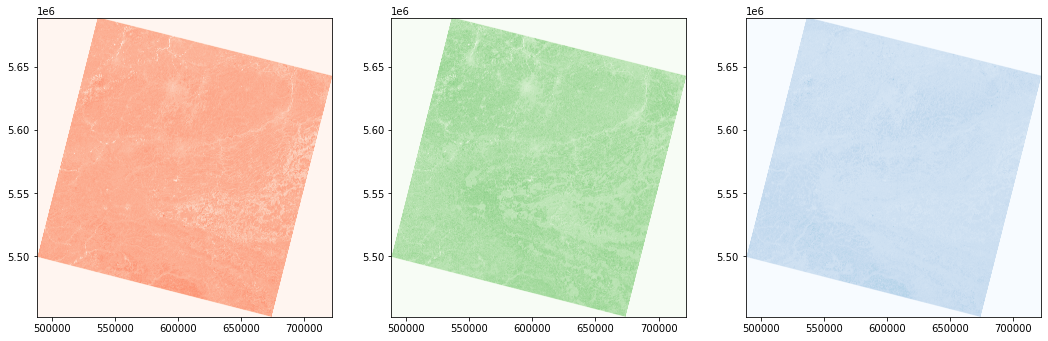

In [ ]:
# Résultat attendu ci-dessous...

<div class="alert alert-block alert-warning">
<b>Question 4.1.3: </b><br>3. Déterminer le crs du raster
</div>

In [6]:
src.crs

CRS.from_epsg(32631)

<div class="alert alert-block alert-warning">
<b>Question 4.1.4: </b><br>4. Afficher le raster en utilisant les couleurs formées par les composantes RGB des trois bandes.
</div>

<AxesSubplot:>

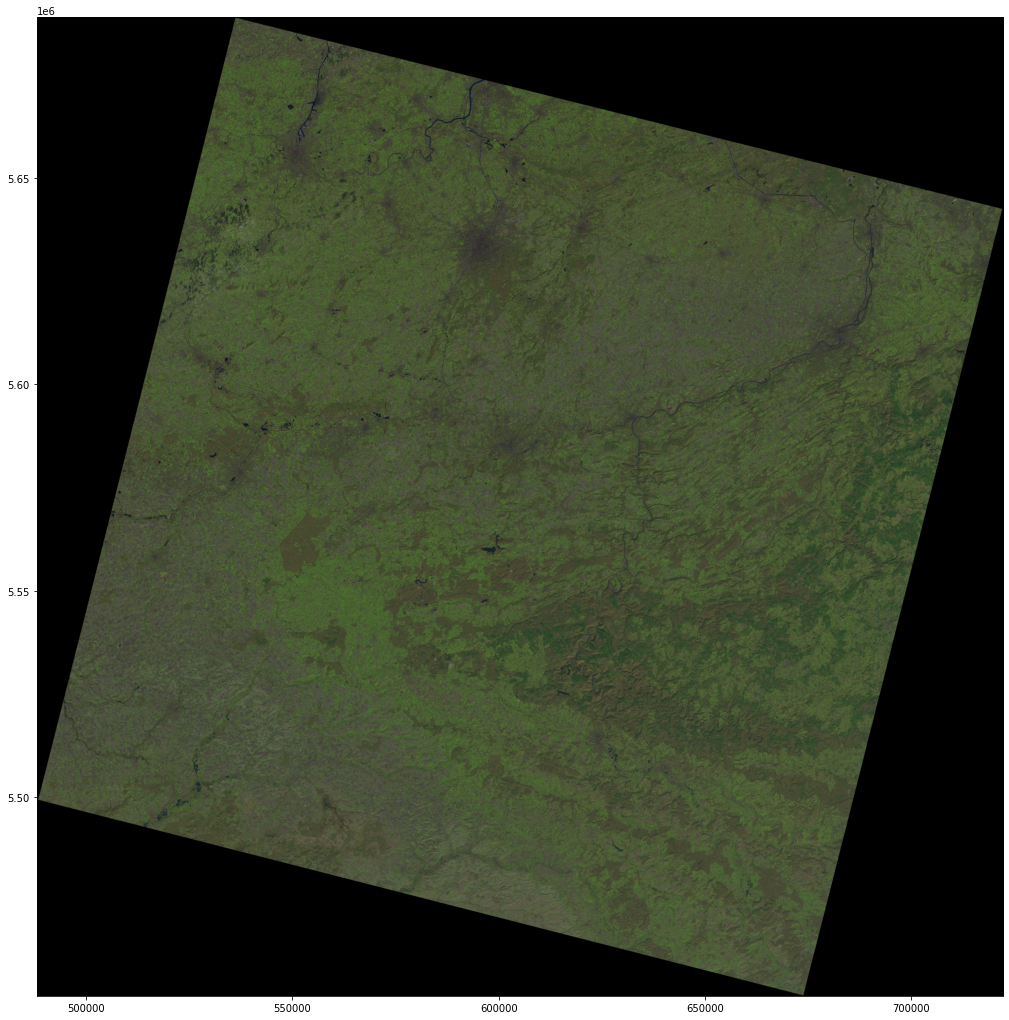

In [ ]:
# Résultat attendu ci-dessous...

<div class="alert alert-block alert-success">
	<b>4.2 Reprojeter l'image et la rééchantillonner</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 4.2.1: </b><br>1. Déterminer la transformation à appliquer
</div>

In [8]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e6473745f637273203d2027455053473a3331333730273c62723e0a7472616e73666f726d2c2077696474682c20686569676874203d2063616c63756c6174655f64656661756c745f7472616e73666f726d287372632e6372732c206473745f6372732c207372632e77696474682c207372632e6865696768742c202a7372632e626f756e6473293c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


<div class="alert alert-block alert-warning">
<b>Question 4.2.2: </b><br>2. Reprojeter l'image dans le système Lambert Belge 1972 et rééchantillonnez-là avec la méthode du plus proche voisin. 
    Enregistrer la nouvelle image.  
</div>

In [9]:
# solution @reveal
kwargs = src.meta.copy()
kwargs.update({
    'crs': dst_crs,
    'transform': transform,
    'width': width,
    'height': height
})

with rio.open('./test_reproject_nearest.tif', 'w', **kwargs) as dst:
    for i in range(1, src.count + 1):
        reproject(
            source=rio.band(src, i),
            destination=rio.band(dst, i),
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=transform,
            dst_crs=dst_crs,
            resampling=Resampling.nearest)

<div class="alert alert-block alert-warning">
<b>Question 4.2.3: </b><br>3. Recharger l'image enregistrée.
</div>

In [10]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e737263203d2072696f2e6f70656e28272e2f746573745f726570726f6a6563745f6e6561726573742e74696627293c62723e0a6669672c206178203d20706c742e737562706c6f74732866696773697a653d2831382c3138292c206e636f6c733d31293c62723e0a73686f77287372632e7265616428292c2061783d61782c207472616e73666f726d3d7372632e7472616e73666f726d293c62723e0a61782e7365745f786c696d283130303030302c20313035303030293c62723e0a61782e7365745f796c696d2839303030302c203935303030293c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


<div class="alert alert-block alert-warning">
<b>Question 4.2.4: </b><br>4. Comparer le rééchantillonnage par la méthode des plus proches voisins avec le spline cubique. 
    Afficher cote à cote un zoom de chaque image dans l'étendue suivante: 
        X:[103000, 105000] Y:[93000, 95000]
</div>

(93000.0, 95000.0)

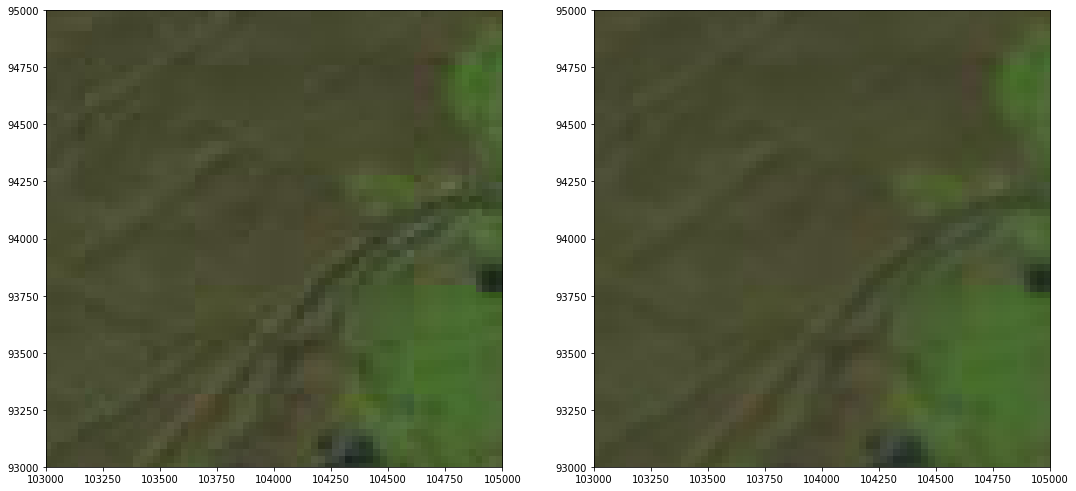

In [ ]:
# Résultat attendu ci-dessous...

<div class="alert alert-block alert-success">
	<b>4.3 Extraire une partie de l'image et l'enregistrer</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 4.3.1: </b><br>1. Créer un rectangle correspondant à l'étendue à l'aide de shapely.
        X:[103000, 105000] Y:[93000, 95000]
</div>

In [13]:
from rasterio.mask import mask
from shapely.geometry import Polygon

In [15]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e6f75745f696d6167652c206f75745f7472616e73666f726d203d206d61736b287372632c205b726563745d2c2063726f703d54727565293c62723e0a6f75745f6d657461203d207372632e6d6574613c62723e0a73686f77286f75745f696d616765293c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


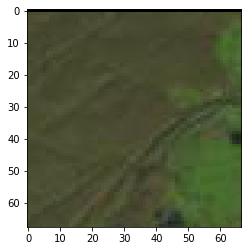

<AxesSubplot:>

In [ ]:
# Résultat attendu ci-dessous...

In [16]:
src.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 7946,
 'height': 8042,
 'count': 3,
 'crs': CRS.from_epsg(31370),
 'transform': Affine(30.006487656723937, 0.0, 38355.8869388211,
        0.0, -30.006487656723937, 227956.8197623482)}

<div class="alert alert-block alert-warning">
<b>Question 4.3.2: </b><br>2. Mettre à jour les métadonnées et sauvegarder l'image découpée au format GTiff sous le nom masked.tif.
</div>

In [18]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e6f75745f6d6574612e757064617465287b22647269766572223a20224754696666222c3c62723e0a202020202020202020202020202020202022686569676874223a206f75745f696d6167652e73686170655b315d2c3c62723e0a2020202020202020202020202020202020227769647468223a206f75745f696d6167652e73686170655b325d2c3c62723e0a2020202020202020202020202020202020227472616e73666f726d223a206f75745f7472616e73666f726d7d293c62723e0a3c62723e0a776974682072696f2e6f70656e28226d61736b65642e746966222c202277222c202a2a6f75745f6d6574612920617320646573743a3c62723e0a20202020646573742e7772697465286f75745f696d616765293c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


<div class="alert alert-block alert-warning">
<b>Question 4.3.3: </b><br>3. Recharger l'image.
</div>

In [19]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e7372635f32203d2072696f2e6f70656e28272e2f6d61736b65642e74696627293c62723e0a73686f77287372635f32293c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


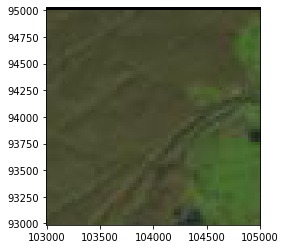

<AxesSubplot:>

In [ ]:
# Résultat attendu ci-dessous...

<div class="alert alert-block alert-success">
	<b>4.4 Découper une image raster par un polygone</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 4.4.1: </b><br>1. Importer le shapefile des anciennes communes. 
    Servez-vous en pour découper l'image du point 1 en la limitant à la nouvelle commune de Mons. 
    Enregistrer l'image découpée et rechargez-la.  
</div>

In [20]:
import geopandas as gpd

In [22]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e6764662e7365745f6372732827455053473a3331333730272c20696e706c6163653d54727565293c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


In [ ]:
# Résultat attendu ci-dessous...

AREA  PERIMETER  ANC_COMMUN      INS CARA                ANCOM  \
0     4.636606e+06  12495.670         366  62108.0  TOT               LANAYE   
1     1.189568e+07  17378.920          38  54002.0  TOT              COMINES   
2     8.885221e+06  14219.230         367  62011.0  TOT           EBEN-EMAEL   
3     6.043729e+06  12224.930          39  54002.0  TOT              HOUTHEM   
4     8.928600e+06  20326.180           1  25005.0  TOT  TOURINNES-LA-GROSSE   
...            ...        ...         ...      ...  ...                  ...   
1601  5.776573e+06  13521.550         739  85047.0  TOT            LAMORTEAU   
1602  5.853303e+06  16469.830         740  85047.0  TOT               TORGNY   
1603  1.600034e+07  19725.301        1083  61028.0   GP             COUTHUIN   
1604  1.229017e+07  16761.170        1103  92003.0   GP             LANDENNE   
1605  1.609998e+05   2259.674        1109  92003.0   PP                HERON   

                NEWCOM    ARROND    PROVINCE           EPU  \
0                 VISE     LIEGE       LIEGE      A.I.D.E.   
1     COMINES-WARNETON  MOUSCRON     HAINAUT        IPALLE   
2             BASSENGE     LIEGE       LIEGE      A.I.D.E.   
3     COMINES-WARNETON  MOUSCRON     HAINAUT        IPALLE   
4          BEAUVECHAIN  NIVELLES     BRABANT        I.B.W.   
...                ...       ...         ...           ...   
1601           ROUVROY    VIRTON  LUXEMBOURG      A.I.V.E.   
1602           ROUVROY    VIRTON  LUXEMBOURG      A.I.V.E.   
1603             HERON       HUY       LIEGE      A.I.D.E.   
1604           ANDENNE     NAMUR       NAMUR  I.N.A.S.E.P.   
1605           ANDENNE     NAMUR       NAMUR  I.N.A.S.E.P.   

                                               geometry  
0     POLYGON ((241977.297 163806.203, 241980.594 16...  
1     POLYGON ((51153.160 163246.000, 51157.578 1632...  
2     POLYGON ((242876.500 166803.297, 242886.297 16...  
3     POLYGON ((52351.441 166997.297, 52344.449 1669...  
4     POLYGON ((175573.297 163242.406, 175582.406 16...  
...                                                 ...  
1601  POLYGON ((229409.000 25423.500, 229439.000 254...  
1602  POLYGON ((233266.703 23374.900, 233354.000 233...  
1603  POLYGON ((202802.094 137131.703, 202909.594 13...  
1604  POLYGON ((197215.906 135883.797, 197268.406 13...  
1605  POLYGON ((200574.906 135675.500, 200977.094 13...  

[1606 rows x 11 columns]

In [23]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e6d6f6e73203d206764662e717565727928274e4557434f4d3d3d224d4f4e532227292e646973736f6c76652862793d274e4557434f4d27293c62723e0a6d6f6e733c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


In [ ]:
# Résultat attendu ci-dessous...

geometry        AREA  \
NEWCOM                                                                  
MONS    POLYGON ((124059.898 120195.102, 124049.898 12...  656793.125   

        PERIMETER  ANC_COMMUN      INS CARA    ANCOM ARROND PROVINCE       EPU  
NEWCOM                                                                          
MONS     4427.599         234  53053.0   PP  CASTEAU   MONS  HAINAUT  I.D.E.A.

In [24]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e6d6f6e735f67656f6d203d206d6f6e732e67656f6d657472793c62723e0a6d6f6e735f67656f6d3c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


In [ ]:
# Résultat attendu ci-dessous...

NEWCOM
MONS    POLYGON ((124059.898 120195.102, 124049.898 12...
Name: geometry, dtype: geometry

In [25]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e6f75745f696d6167652c206f75745f7472616e73666f726d203d206d61736b287372632c206d6f6e735f67656f6d2c2063726f703d54727565293c62723e0a6f75745f6d657461203d207372632e6d6574613c62723e0a73686f77286f75745f696d616765293c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


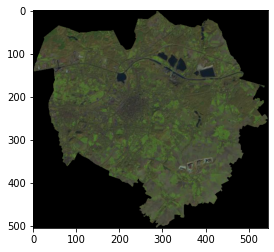

<AxesSubplot:>

In [ ]:
# Résultat attendu ci-dessous...

In [26]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e6f75745f6d6574612e757064617465287b22647269766572223a20224754696666222c3c62723e0a202020202020202020202020202020202022686569676874223a206f75745f696d6167652e73686170655b315d2c3c62723e0a2020202020202020202020202020202020227769647468223a206f75745f696d6167652e73686170655b325d2c3c62723e0a2020202020202020202020202020202020227472616e73666f726d223a206f75745f7472616e73666f726d7d293c62723e0a3c62723e0a776974682072696f2e6f70656e28226d6f6e732e746966222c202277222c202a2a6f75745f6d6574612920617320646573743a3c62723e0a20202020646573742e7772697465286f75745f696d616765293c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


In [ ]:
# Résultat attendu ci-dessous...

In [27]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e6669672c206178203d20706c742e737562706c6f74732866696773697a653d2831322c313229293c62723e0a7372635f33203d2072696f2e6f70656e28272e2f6d6f6e732e746966272c2061783d6178293c62723e0a73686f77287372635f33293c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


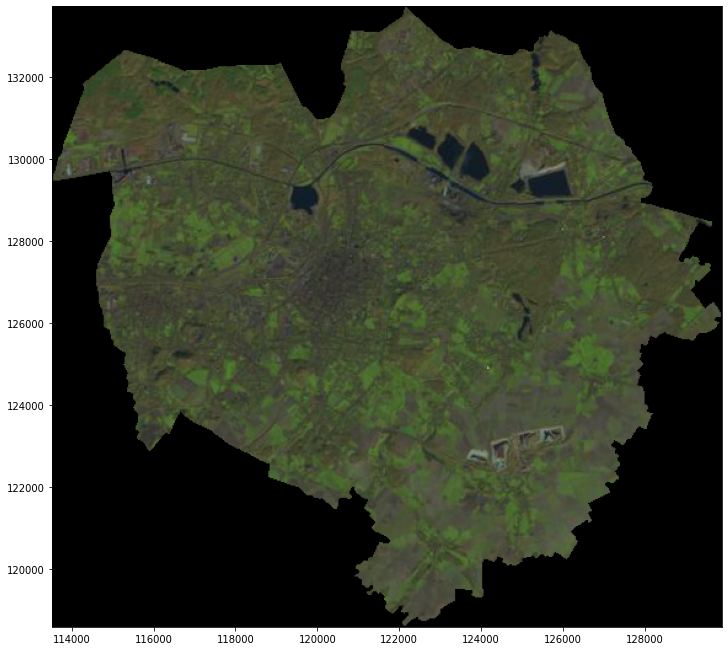

<AxesSubplot:>

In [ ]:
# Résultat attendu ci-dessous...